In [1]:
n = 128
println("Size of matrix ", n)

# Initialize the matrix
Qe, Re = qr(rand(n,n))
# Qe is orthogonal, Re is upper triangular
for i = 1 : n
    # Multiply row i by 1/2^i
    Re[i,:] = 1.0/2.0^(i-1) * Re[i,:]
end

# A = Qe * Re
A = Qe * Re
# Compute QR factorization of A
Q, R = qr(A)

# Fix possible differences in the sign of the diagonal entries of R
for i = 1 : n
    if R[i,i] * Re[i,i] < 0
        R[i,:] = -R[i,:]
        Q[:,i] = -Q[:,i]
    end
end

# We now expect that Q=Qe and R=Re.

# Calculate the error in Q
err = zeros(n)
for j = 1 : n
    # Processing column j
    err[j] = norm(Q[:,j] - Qe[:,j])
end

Size of matrix 128


In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()


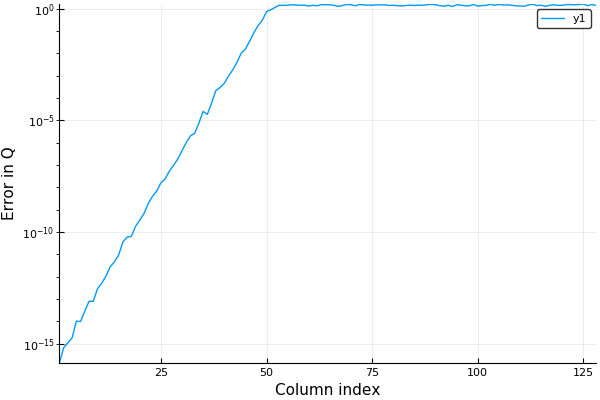

In [3]:
# Plot the error in Q
plot(err, yscale=:log10)
xlabel!("Column index")
ylabel!("Error in Q")